<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import io
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* sex: male = 1, female = 0
* diabetes: 0 = no, 1 = yes
* anaemia: 0 = no, 1 = yes
* high_blood_pressure: 0 = no, 1 = yes
* smoking: 0 = no, 1 = yes
* DEATH_EVENT: 0 = no, 1 = yes

* Age: age of patient (years)
* Anaemia: decrease of RBC or hemogoblin (yes/no)
* CPK: Level of CPK (mcg/L)
* Diabetes: has diabetes (yes/no)
* Ejection fraction: percentage of blood leaving (%)
* Sex: sex of patient (male/female)
* Platelets: platelet count (kp/mL)
* Serum Creatinine: level of creatinine in blood (mg/dL)
* Serum Sodium: level of sodium in blood (mEq/L)
* Smoking: if patient smokes (yes/no)
* Time: follow-up period (days)
* [target] Death Event: if patient died during follow-up period (yes/no)

In [3]:
data.isna().sum()
#pretty clean data, but there is a lot that we are unsure of regarding the features.
# what is time and how is it relevant? 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
import plotly.express as px
fig=px.pie(data, names='DEATH_EVENT', title='Death events in Patients', width=900, height=400)
fig.show()
#most patients (68%) died due to heart failure

In [5]:
fig=px.pie(data, names='sex', title='Disribution of sex', width=900, height=400)
fig.show()
#mostly males were recorded (65%)

* According to research, the following increase risk of heart failure:
 * High blood pressure
 * Anemia
 * Diabetes
 * Rise in serum creatinine
 * If CPK level is high, there is injury/stress in heart
 * Smoking

* Things that could be interesting to find:
 * Relationship between age and smoking



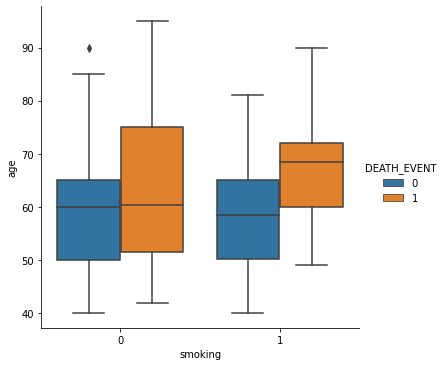

In [6]:
sns.catplot(x='smoking', y='age', hue='DEATH_EVENT', kind='box',data=data)
#with age, smoking plays a large factor in heart failure
#death event is high for smoking person
#survival is high for non-smoking person from 55-65, while for smoking its high from 50-60

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = data[(data["DEATH_EVENT"]==0) & (data["diabetes"]==0)]
d2 = data[(data["DEATH_EVENT"]==0) & (data["diabetes"]==1)]
d3 = data[(data["DEATH_EVENT"]==1) & (data["diabetes"]==0)]
d4 = data[(data["DEATH_EVENT"]==1) & (data["diabetes"]==1)]

label = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label, values=[len(d1),len(d2),len(d3),len(d4)]))
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(title_text='Diabetes vs Death')

fig.show()

In [8]:
age_fig = px.histogram(data, x='age', color='DEATH_EVENT', marginal='violin', hover_data=data.columns,
                       title='Distribution of Age and Death Event', labels={'age': 'AGE'}, template='plotly_dark',
                       color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
age_fig.show()

In [9]:
cre_fig = px.histogram(data, x='creatinine_phosphokinase', color='DEATH_EVENT', marginal='violin', hover_data=data.columns,
                       title='Distribution of Creatinine Phosphokinase and Death Event', labels={'creatinine_phosphokinase': 'Creatinine Phosphokinase'},
                       template='plotly_dark', color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
cre_fig.show()

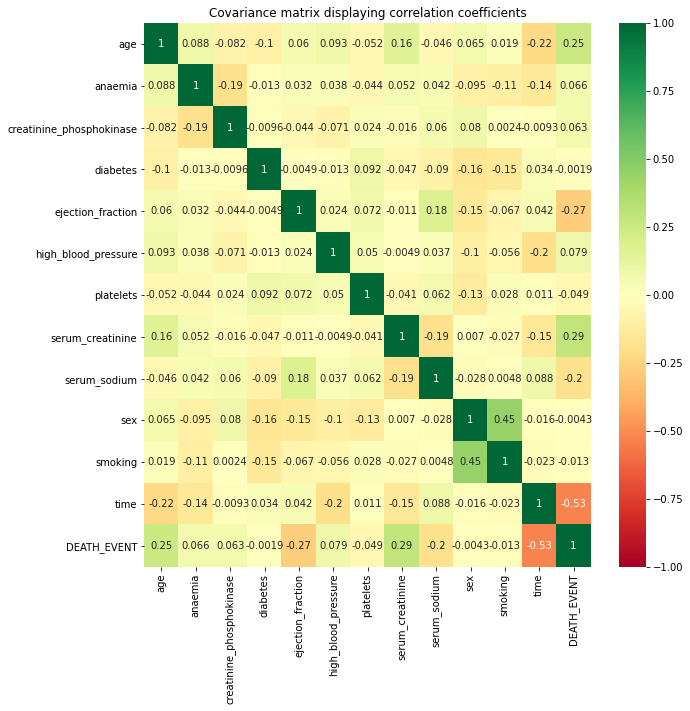

In [10]:
plt.figure(figsize=(10,10))
plt.title('Covariance matrix displaying correlation coefficients')
sns.heatmap(data.corr(), vmin=-1, cmap='RdYlGn', annot=True);

* Time seems to have a large relation to death event (which should not be the case)
* A lot of the data is vague at first, and where correlations should be found, there is not as much

Features to keep:
* Time
* High blood pressure
* Ejection fraction
* Serum creatinine
* Age
* Serum sodium

In [42]:
from sklearn.model_selection import train_test_split
features = ['time', 'ejection_fraction', 'serum_creatinine', 'age', 'serum_sodium', 'high_blood_pressure']
x=data[features]
y=data.DEATH_EVENT

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_test.head()

,time,ejection_fraction,serum_creatinine,age,serum_sodium,high_blood_pressure
179,147,40,0.7,55.0,140,0
221,200,50,1.1,65.0,145,0
226,205,25,1.3,58.0,132,0
7,10,60,1.1,60.0,131,0
173,146,20,0.8,50.0,139,0


In [55]:
import xgboost
from sklearn.metrics import accuracy_score

xgb = xgboost.XGBRFClassifier(max_depth=4, random_state=1)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print(f'Score: {round(accuracy_score(y_test,pred)*100, 2)}%')

Score: 93.33%
